# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 62.3 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 19:33:16--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 19:33:17--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc870336b294b6f4bbb2735e0cc1.dl.dropboxusercontent.com/cd/0/get/CHz3A2tNFwGp4jj2DeXwYY0N-WuRoeIMM_VN3azQPJLqlZ0t4DOOsbxviJNekCFjGZZdUDzduX78Ol07jhNP3dVNgL1NVcvvuWfjIR76XnMdWSSA1rFMO6ZF6iK8_uKzBR5gaoFYE6di7BkvzGkrQ_IG/file?dl=1# [following]
--2023-11-18 19:33:17--  https://uc870336b294b6f4bbb2735e0cc1.dl.dropboxusercontent.com/cd/0/get/CHz3A2tNFwGp4jj2DeXwYY0N-WuRoeIMM_VN3azQPJLqlZ0t4DOOsbxviJNekCFjGZZdUDzduX78Ol07jhNP3dVNgL1NVcvvuWfjIR7

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [6]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=2)

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

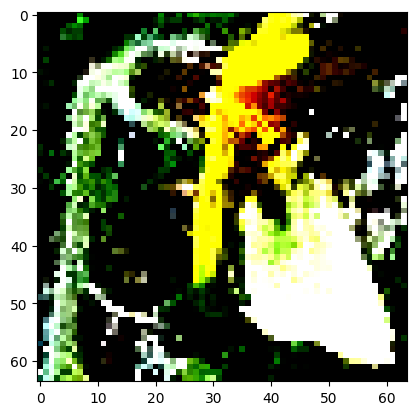

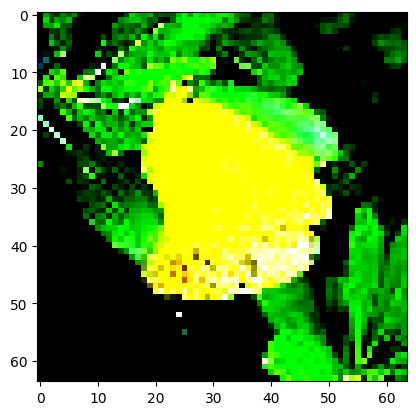

In [8]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Тренировочный класс lightning

In [6]:
class LiModule(pl.LightningModule):
    def __init__(self, model, learning_rate, optimaizer, sheduler=None):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.optimaizer = optimaizer(self.parameters(), lr=self.learning_rate)
        self.sheduler = sheduler(self.optimaizer, 'max', patience=2) if sheduler else None
        self.loss = nn.CrossEntropyLoss()
        self.save_hyperparameters()

    def forward(self, x):
        return self.model(x)

    def evaluate(self, batch, stage=None):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y)
        preds = torch.argmax(logits, dim=1)

        acc = accuracy(preds, y, task="multiclass",
                       num_classes=len(val_dataset.classes))
        if stage:
            self.log(f"{stage}_loss", loss, prog_bar=True)
            self.log(f"{stage}_acc", acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        if not self.sheduler:
            return self.optimaizer
        return {
            "optimizer": self.optimaizer,
            "lr_scheduler": {
            "scheduler": self.sheduler,
            "monitor": "val_acc"
            }}

    def training_step(self, train_batch):
        return self.evaluate(train_batch, stage='train')

    def validation_step(self, val_batch):
        self.evaluate(val_batch, stage='val')

    def predict_step(self, batch):
        logits = self.model(batch[0])
        return torch.argmax(logits, dim=1)

#### эксперимент 1

In [ ]:
from torchvision.models import mobilenet_v3_large

model = mobilenet_v3_large(weights=None, num_classes=200)

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(model,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, precision='bf16-true', fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | MobileNetV3      | 4.5 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
4.5 M     Trainable params
0         Non-trainable params
4.5 M     Total params
17.833    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 2

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=2)

In [ ]:
from torchvision.models import resnet18

In [ ]:
model = resnet18(weights=None, num_classes=200)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(model,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 3

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-tnz323gz:v14', type='model')
artifact_dir = artifact.download()

In [ ]:
model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.00005)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(model,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | LiModule         | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 4

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-tnz323gz:v14', type='model')
artifact_dir = artifact.download()

In [ ]:
module = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.0005)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


#### эксперимент 5

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-tnz323gz:v14', type='model')
artifact_dir = artifact.download()

In [ ]:
module = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.0001)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 6

In [ ]:
from torchvision.models import mobilenet_v3_large

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = mobilenet_v3_large(weights=None)
        self.model_1.classifier = nn.Identity()

        self.model_2 = mobilenet_v3_large(weights=None)
        self.model_2.classifier = nn.Identity()

        self.model_3 = mobilenet_v3_large(weights=None)
        self.model_3.classifier = nn.Identity()

        self.model_4 = mobilenet_v3_large(weights=None)
        self.model_4.classifier = nn.Identity()

        self.classifier = nn.Sequential(
                nn.Linear(in_features=960 * 4, out_features=1280, bias=True),
                nn.Hardswish(),
                nn.Dropout(p=0.2, inplace=True),
                nn.Linear(in_features=1280, out_features=1000, bias=True)
  )

    def forward(self, x):
        x1 = self.model_1(x)
        x2 = self.model_2(x)
        x3 = self.model_3(x)
        x4 = self.model_4(x)

        x = torch.cat((x1, x2, x3, x4), dim=1)

        x = self.classifier(x)
        return x

In [ ]:
my_net = YourNet()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
module = LiModule(my_net,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
wandb: Currently logged in as: pvlshknv. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 7

In [ ]:
from torchvision.models import efficientnet_b4

model = efficientnet_b4(weights=None, num_classes=200)

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(model,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
wandb: Currently logged in as: pvlshknv. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 17.9 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
17.9 M    Trainable params
0         Non-trainable params
17.9 M    Total params
71.629    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 8

In [ ]:
from torchvision.models import resnet18

model = resnet18(weights=None, num_classes=200)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = resnet18(weights=None, num_classes=200)
        self.model_2 = resnet18(weights=None, num_classes=200)
        self.model_3 = resnet18(weights=None, num_classes=200)
        self.model_4 = resnet18(weights=None, num_classes=200)

        self.classifier = nn.Sequential(
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=True),
                nn.Linear(in_features=200 * 4, out_features=200, bias=True)
        )

    def forward(self, x):
        x1 = self.model_1(x)
        x2 = self.model_2(x)
        x3 = self.model_3(x)
        x4 = self.model_4(x)

        x = torch.cat((x1, x2, x3, x4), dim=1)

        x = self.classifier(x)
        return x

In [ ]:
my_net = YourNet()

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
module = LiModule(model,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)       # precision='bf16-true',

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 45.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
45.3 M    Trainable params
0         Non-trainable params
45.3 M    Total params
181.107   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 9

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=2)

In [ ]:
from torchvision.models import efficientnet_b3

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(efficientnet_b3(weights=None),
                  learning_rate=0.002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)       # precision='bf16-true',

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
wandb: Currently logged in as: pvlshknv. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 10

In [ ]:
from torchvision.models import efficientnet_b3

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(efficientnet_b3(weights=None),
                  learning_rate=0.005,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)       # precision='bf16-true',

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 11

In [ ]:
from torchvision.models import efficientnet_b3

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
module = LiModule(efficientnet_b3(weights=None),
                  learning_rate=0.001,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 12

In [ ]:
train_transform = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=2)

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-z6z1ac8w:v14', type='model')
artifact_dir = artifact.download()

module = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt")

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 13

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.SVHN),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=2)

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-1jqrv20e:v9', type='model')
artifact_dir = artifact.download()

module = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt")

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


#### эксперимент 14

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-hko2o68v:v9', type='model')
artifact_dir = artifact.download()

module = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.0005)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hw_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 12.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.2 M    Trainable params
0         Non-trainable params
12.2 M    Total params
48.933    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Валидация результатов задания

In [7]:
from sklearn.metrics import accuracy_score


def evaluate_task(model, test_dataloader):
  y_true = []
  y_pred = []

  for batch in val_dataloader:
      _, y = batch
      y_true.extend(y.numpy())

  trainer = pl.Trainer()
  for y in trainer.predict(model, dataloaders=test_dataloader):
      y_pred.extend(y.numpy())

  return accuracy_score(y_pred, y_true)

In [13]:
run = wandb.init()
artifact = run.use_artifact('pvlshknv/hw_2/model-hko2o68v:v9', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt")

accuracy = evaluate_task(model, val_dataloader)

wandb: Currently logged in as: pvlshkunov. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact model-hko2o68v:v9, 141.02MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:2.4
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [14]:
accuracy

0.4362

In [15]:
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

Оценка за это задание составит 9.91 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Тренировочный класс lightning

In [ ]:
class LiModule(pl.LightningModule):
    def __init__(self, model, learning_rate, optimaizer, sheduler=None):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.optimaizer = optimaizer(self.parameters(), lr=self.learning_rate)
        self.sheduler = sheduler(self.optimaizer, 'max', patience=2) if sheduler else None
        self.loss = nn.CrossEntropyLoss()
        self.save_hyperparameters()

    def forward(self, x):
        return self.model(x)

    def evaluate(self, batch, stage=None):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y)
        preds = torch.argmax(logits, dim=1)

        acc = accuracy(preds, y, task="multiclass",
                       num_classes=len(val_dataset.classes))
        if stage:
            self.log(f"{stage}_loss", loss, prog_bar=True)
            self.log(f"{stage}_acc", acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        if not self.sheduler:
            return self.optimaizer
        return {
            "optimizer": self.optimaizer,
            "lr_scheduler": {
            "scheduler": self.sheduler,
            "monitor": "val_acc"
            }}


    def training_step(self, train_batch):
        return self.evaluate(train_batch, stage='train')

    def validation_step(self, val_batch):
        self.evaluate(val_batch, stage='val')

    def predict_step(self, batch):
        logits = self.model(batch[0])
        return torch.argmax(logits, dim=1)

#### эксперимент 1

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=5),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
from torchvision.models import mobilenet_v3_large, efficientnet_b1, regnet_x_800mf

In [ ]:
model = mobilenet_v3_large(None)
# model.classifier = nn.Identity()
# model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = mobilenet_v3_large('DEFAULT')
        self.model_1.classifier = nn.Identity()

        self.model_2 = mobilenet_v3_large('DEFAULT')
        self.model_2.classifier = nn.Identity()

        self.model_3 = mobilenet_v3_large('DEFAULT')
        self.model_3.classifier = nn.Identity()

        self.model_4 = mobilenet_v3_large('DEFAULT')
        self.model_4.classifier = nn.Identity()

        self.classifier = nn.Sequential(
                nn.Linear(in_features=960 * 4, out_features=1280, bias=True),
                nn.Hardswish(),
                nn.Dropout(p=0.2, inplace=True),
                nn.Linear(in_features=1280, out_features=1000, bias=True)
  )

    def forward(self, x):
        x1 = self.model_1(x)
        x2 = self.model_2(x)
        x3 = self.model_3(x)
        x4 = self.model_3(x)

        x = torch.cat((x1, x2, x3, x4), dim=1)

        x = self.classifier(x)
        return x

In [ ]:
my_net = YourNet()

In [ ]:
module = LiModule(my_net,
                  learning_rate=0.0002,
                  optimaizer=torch.optim.AdamW,
                  sheduler=torch.optim.lr_scheduler.ReduceLROnPlateau)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 18.1 M
----------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 2

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=5),
    # transforms.RandomHorizontalFlip(p=0.2),
    # transforms.RandomVerticalFlip(p=0.2),
    # transforms.ColorJitter(brightness=.5, hue=.3),
    # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
from torchvision.models import mobilenet_v3_large, efficientnet_b1, regnet_x_800mf

In [ ]:
model = mobilenet_v3_large(None)
# model.classifier = nn.Identity()
# model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = mobilenet_v3_large('DEFAULT')
        self.model_1.classifier = nn.Identity()

        self.model_2 = mobilenet_v3_large('DEFAULT')
        self.model_2.classifier = nn.Identity()

        self.model_3 = mobilenet_v3_large('DEFAULT')
        self.model_3.classifier = nn.Identity()

        self.model_4 = mobilenet_v3_large('DEFAULT')
        self.model_4.classifier = nn.Identity()

        self.classifier = nn.Sequential(
                nn.Linear(in_features=960 * 4, out_features=1280, bias=True),
                nn.Hardswish(),
                nn.Dropout(p=0.2, inplace=True),
                nn.Linear(in_features=1280, out_features=1000, bias=True)
  )

    def forward(self, x):
        x1 = self.model_1(x)
        x2 = self.model_2(x)
        x3 = self.model_3(x)
        x4 = self.model_3(x)

        x = torch.cat((x1, x2, x3, x4), dim=1)

        x = self.classifier(x)
        return x

In [ ]:
my_net = YourNet()

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 155MB/s]


In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-08jidfb5:v2', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt")

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

#### эксперимент 3

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-08jidfb5:v2', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.00005)

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 4

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=5),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ColorJitter(brightness=.5, hue=.3),
    # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-zoo403ir:v1', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.0002)

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


#### эксперимент 5

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),
    # transforms.RandomRotation(degrees=5),
    # transforms.RandomHorizontalFlip(p=0.2),
    # transforms.RandomVerticalFlip(p=0.2),
    # transforms.ColorJitter(brightness=.5, hue=.3),
    # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-zoo403ir:v1', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.0001)

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

#### эксперимент 6

In [ ]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-zoo403ir:v1', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.00005)

In [ ]:
# wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

#### эксперимент 7

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    # transforms.RandomRotation(degrees=5),
    # transforms.RandomHorizontalFlip(p=0.2),
    # transforms.RandomVerticalFlip(p=0.2),
    # transforms.ColorJitter(brightness=.5, hue=.3),
    # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-9nsh1ddm:v3', type='model')
artifact_dir = artifact.download()

In [ ]:
model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt", learning_rate=0.00005)

In [ ]:
wandb.finish()

In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, fast_dev_run=False)

trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 18.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.341    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

#### эксперимент 8

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(232),
    transforms.CenterCrop(224)
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(232),
    transforms.CenterCrop(224)
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
from torchvision.models import convnext_tiny

In [ ]:
model = convnext_tiny(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:04<00:00, 27.1MB/s]


In [ ]:
# model

In [ ]:
model.classifier[2] = nn.Linear(in_features=768, out_features=200, bias=True)

In [ ]:
module = LiModule(model,
                  learning_rate=0,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer()

tuner = pl.tuner.Tuner(trainer)
results = tuner.lr_find(
    module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    min_lr=1e-8,
    max_lr=1e-3,
    num_training=500
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antiali

Finding best initial lr:   0%|          | 0/500 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0005248074602497723
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_014ea124-77e3-4353-bde0-988f78f99804.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_014ea124-77e3-4353-bde0-988f78f99804.ckpt


In [ ]:
module = LiModule(model,
                  learning_rate=0.0005,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
swa = pl.callbacks.StochasticWeightAveraging(swa_lrs=1e-2)

wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: pvlshkunov. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ConvNeXt         | 28.0 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
28.0 M    Trainable params
0         Non-trainable params
28.0 M    Total params
111.896   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

#### эксперимент 9

In [ ]:
from torchvision.models import efficientnet_v2_s

In [ ]:
model = efficientnet_v2_s(weights="DEFAULT")

In [ ]:
# model

In [ ]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=200, bias=True)

In [ ]:
module = LiModule(model,
                  learning_rate=0,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer()

tuner = pl.tuner.Tuner(trainer)
results = tuner.lr_find(
    module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    min_lr=1e-8,
    max_lr=1e-3,
    num_training=1000
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antiali

Finding best initial lr:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00025703957827688637
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_37682314-7734-4337-b218-f16c0022e676.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_37682314-7734-4337-b218-f16c0022e676.ckpt


In [ ]:
module = LiModule(model,
                  learning_rate=0.00026,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
swa = pl.callbacks.StochasticWeightAveraging(swa_lrs=1e-2)

wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[swa, checkpoint_callback],
                     gradient_clip_val=0.5)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 20.4 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
20.4 M    Trainable params
0         Non-trainable params
20.4 M    Total params
81.735    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

#### эксперимент 10

In [ ]:
from torchvision.models import efficientnet_v2_m

In [ ]:
model = efficientnet_v2_m(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:02<00:00, 87.9MB/s]


In [ ]:
# model

In [ ]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=200, bias=True)

In [ ]:
module = LiModule(model,
                  learning_rate=0,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
seed_everything(123456)

In [ ]:
trainer = pl.Trainer()

tuner = pl.tuner.Tuner(trainer)
results = tuner.lr_find(
    module,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    min_lr=0.00009,
    max_lr=0.0009,
    num_training=500
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antiali

Finding best initial lr:   0%|          | 0/500 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00028723840695906854
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_d37700df-56fd-441a-ad3d-26d9b070c02a.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_d37700df-56fd-441a-ad3d-26d9b070c02a.ckpt


In [ ]:
module = LiModule(model,
                  learning_rate=0.00028,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")
wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: pvlshkunov. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 53.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
53.1 M    Trainable params
0         Non-trainable params
53.1 M    Total params
212.458   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


#### эксперимент 11

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(232),
    transforms.CenterCrop(224)
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(232),
    transforms.CenterCrop(224)
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=32, num_workers=2)

In [ ]:
from torchvision.models import convnext_large

In [ ]:
model = convnext_large(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth
100%|██████████| 755M/755M [00:13<00:00, 58.7MB/s]


In [ ]:
# model

In [ ]:
model.classifier[2] = nn.Linear(in_features=1536, out_features=200, bias=True)

In [ ]:
module = LiModule(model,
                  learning_rate=0,
                  optimaizer=torch.optim.AdamW)

In [ ]:
seed_everything(123456)

In [ ]:
module = LiModule(model,
                  learning_rate=0.00028,
                  optimaizer=torch.optim.AdamW)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_acc", mode="max")

wandb_logger = WandbLogger(log_model='all', project='hww_2')

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, callbacks=[checkpoint_callback],
                     gradient_clip_val=0.5, max_epochs=2)

trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: pvlshkunov. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ConvNeXt         | 196 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
196 M     Trainable params
0         Non-trainable params
196 M     Total params
786.151   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

### Валидация результатов задания

In [8]:
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize(232),
    transforms.CenterCrop(224)
])

val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=32, num_workers=2)

In [9]:
run = wandb.init()
artifact = run.use_artifact('pvlshkunov/hww_2/model-62xml0pc:v0', type='model')
artifact_dir = artifact.download()

model = LiModule.load_from_checkpoint(Path(artifact_dir) / "model.ckpt")

accuracy = evaluate_task(model, val_dataloader)

wandb: Currently logged in as: pvlshkunov. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact model-rkgkd8hl:v0, 2249.75MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:21.8
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference trans

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [4]:
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

Оценка за это задание составит 9.12 баллов


# Отчёт об экспериментах

## [Отчет по заданию 1](https://api.wandb.ai/links/pvlshknv/7dpozmmg)

1) Модель mobilenet_v3_large, lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, для ускорения используется bf16 точность, аугментации не использутся. На четвертой эпохе удалось достичь acuraccy 0.02 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/im83yus2)

2) Модель resnet18 lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment. На 25 эпохе удалось достичь acuraccy 0.35 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/tnz323gz)

3) Модель со второго эксперимента (чекпоинт 14 эпохи), обучение продолжено с другим lr=0.0005. После одной эпохи обучения acuraccy упало до 0.32
[графики](https://wandb.ai/pvlshknv/hw_2/runs/oer95023)

4) Модель со второго эксперимента (чекпоинт 14 эпохи), обучение продолжено с другим lr=0.0005. После одной эпохи обучения acuraccy упало до 0.28
[графики](https://wandb.ai/pvlshknv/hw_2/runs/bs7rjgv2)

5) Модель со второго эксперимента (чекпоинт 14 эпохи), обучение продолжено с другим lr=0.0001. С таким lr acuraccy тоже только падало
[графики](https://wandb.ai/pvlshknv/hw_2/runs/0jh7lkcl)

6) Модель, состоящая из 4 блоков mobilenet_v3_large, lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment. На третьей эпохе удалось достичь acuraccy 0.19 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/gadzfxs5)

7) Модель efficientnet_b4 lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment. На пятой эпохе удалось достичь acuraccy 0.05 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/lobalzrk)

8) Модель, состоящая из 4 блоков resnet18, lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment. На двенадцатой эпохе удалось достичь acuraccy 0.33 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/tsv6skb0)

9) Модель efficientnet_b3 lr=0.0002, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация не используется. На второй эпохе удалось достичь acuraccy 0.04 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/09nhezsh)

10) Модель efficientnet_b3 lr=0.0005, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация не используется. После первой эпохи acuraccy 0.02 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/5jm891wj)

11) Модель efficientnet_b3 lr=0.0001, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация не используется. На пятнадцатой эпохе удалось достичь acuraccy 0.34 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/z6z1ac8w)

12) Модель чекпоинт с эксперимента 10, добавлена аугментация - AutoAugment. На семнадцатой эпохе удалось достичь acuraccy 0.408 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/1jqrv20e)

13) Модель чекпоинт с эксперимента 11, изменен способ автоаугментации - AutoAugmentPolicy.SVHN.  На четырнадцатой эпохе удалось достичь acuraccy 0.436 на валидации
[графики](https://wandb.ai/pvlshknv/hw_2/runs/hko2o68v)

14) Модель чекпоинт с эксперимента 12, изменен шаг обучения - 0.0005. Accuracy упала до 0.432
[графики](https://wandb.ai/pvlshknv/hw_2/runs/em6y319t)


## [Отчет по заданию 2](https://wandb.ai/pvlshkunov/hww_2/reports/-2--Vmlldzo2MDEwNTMy)

1) Модель, состоящая из 4 блоков mobilenet_v3_large, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5,
аугментации RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter, RandomPerspective.
После одной эпохи acuraccy 0.51.
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/07lkt275)

2) Модель, состоящая из 4 блоков mobilenet_v3_large, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5,
аугментации RandomRotation
После одной эпохи acuraccy 0.72
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/m08qngr5)

3) Модель со второго эксперимента чекпоинт эпохи 2, обучение продолжено с другим lr=0.00005. После двух эпох обучения acuraccy поднялось до 0.75
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/zoo403ir)

4) Модель с третьего эксперимента чекпоинт эпохи 1, обучение продолжено с другим lr=0.0002. Добавлены дополнительные аугментации RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter. После первой эпохи acuraccy упало до 0.69
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/ia5mm7sj)

5) Модель с третьего эксперимента чекпоинт эпохи 1, обучение продолжено с другим lr=0.0001. Изменена аугментация - AutoAugment. Сначало acuraccy упало, но уже на второй эпохе поднялось до 0.74
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/lzqlfl86)

6) Модель с третьего эксперимента чекпоинт эпохи 1, обучение продолжено с другим lr=0.00005. Аугментация - AutoAugment. После двух эпох обучения acuraccy поднялось до 0.756
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/9nsh1ddm)

7) Модель с шестого эксперимента чекпоинт эпохи 3, обучение продолжено с другим lr=0.00005. Аугментация - AutoAugment, AutoAugmentPolicy.CIFAR10. После первой эпохи acuraccy 0.759
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/u0v6qh4b)

8) Модель convnext_tiny, lr=0.0005, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment.
После одной эпохи acuraccy 0.68
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/yoo1ht93)

9) Модель efficientnet_v2_s, lr=0.00026, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment.
После второй эпохи acuraccy 0.776
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/0x5rl4q1)

10) Модель efficientnet_v2_m, lr=0.00028, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment.
После второй эпохи acuraccy 0.72
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/74n8cgoy)

11) Модель convnext_large, lr=0.00028, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментация - AutoAugment.
После первой эпохи acuraccy 0.795
[графики](https://wandb.ai/pvlshkunov/hww_2/runs/rkgkd8hl)

12) Модель convnext_large, lr=0.00028, оптимайзер AdamW, шедулер ReduceLROnPlateau, gradient_clip_val=0.5, аугментации нет. После первой эпохи acuraccy 0.811 [графики](https://wandb.ai/pvlshkunov/hww_2/runs/62xml0pc)
